In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
(X_trainf,y_trainf),(X_testf,y_testf) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_trainf.shape

(60000, 28, 28)

In [ ]:
y_trainf[0]

9

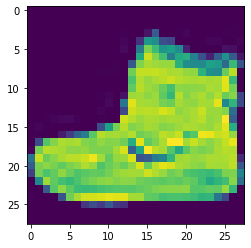

In [ ]:
plt.imshow(X_trainf[0])

In [ ]:
fashion_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
cifar10_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
cifar10_classes[y_train[0][0]]

'frog'

In [ ]:
fashion_classes[y_trainf[0]]

'Ankle boot'

**Preprocesing: scaling Images**

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
#One Hot Encoding inorder to process categorical_crossentropy optimization
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
X_trainf_scaled = X_trainf/255
X_testf_scaled = X_testf/255

In [ ]:
cifar_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    #keras.layers.Dense(15000,activation='relu'),
    keras.layers.Dense(5000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
cifar_model.compile(optimizer='SGD',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
cifar_model.fit(X_train_scaled,y_train_categorical,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.9528 - accuracy: 0.2990
Epoch 2/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6752 - accuracy: 0.4118
Epoch 3/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5727 - accuracy: 0.4531
Epoch 4/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.5225 - accuracy: 0.4701
Epoch 5/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4710 - accuracy: 0.4899


In [ ]:
cifar_model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 7s 23ms/step - loss: 1.5348 - accuracy: 0.4658


[1.5347914695739746, 0.4657999873161316]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = cifar_model.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification_report:\n",classification_report(y_test,y_pred_classes))

Classification_report:
               precision    recall  f1-score   support

           0       0.73      0.30      0.43      1000
           1       0.53      0.70      0.60      1000
           2       0.49      0.16      0.24      1000
           3       0.28      0.53      0.36      1000
           4       0.46      0.31      0.37      1000
           5       0.37      0.37      0.37      1000
           6       0.44      0.67      0.53      1000
           7       0.56      0.52      0.54      1000
           8       0.58      0.64      0.61      1000
           9       0.58      0.47      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [ ]:
cnn_cifar = keras.Sequential([
    #convolution with relu
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    
    #Pooling Layer
    keras.layers.MaxPooling2D((2,2)),
    #convolution with relu
    keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    
    #Pooling Layer
    keras.layers.MaxPooling2D((2,2)),

    #Fully Connected Layer
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
cnn_cifar.compile(optimizer= 'adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_cifar.fit(X_train_scaled,y_train_categorical,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.7027 - accuracy: 0.3807
Epoch 2/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1457 - accuracy: 0.5948
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9961 - accuracy: 0.6483
Epoch 4/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9080 - accuracy: 0.6826
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8509 - accuracy: 0.7029


In [ ]:
cnn_cifar.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 4s 12ms/step - loss: 0.9389 - accuracy: 0.6741


[0.9388574361801147, 0.6740999817848206]

In [ ]:
y_pred = cnn_cifar.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification_report:\n",classification_report(y_test,y_pred_classes))

Classification_report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.84      0.75      0.79      1000
           2       0.63      0.45      0.53      1000
           3       0.50      0.48      0.49      1000
           4       0.63      0.61      0.62      1000
           5       0.65      0.49      0.56      1000
           6       0.57      0.88      0.69      1000
           7       0.77      0.70      0.73      1000
           8       0.79      0.78      0.78      1000
           9       0.69      0.82      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [ ]:
cifar10_classes[np.argmax(cifar_model.predict(X_test_scaled)[0])]

'cat'

In [ ]:
cifar10_classes[y_test[0][0]]

'cat'

In [ ]:
fashion_model= keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(6000,activation='relu'),
      keras.layers.Dense(2000,activation='relu'),
      keras.layers.Dense(500,activation='relu'),
      keras.layers.Dense(10,activation='sigmoid')
])
fashion_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
fashion_model.fit(X_trainf_scaled,y_trainf,epochs=1)

1875/1875 [==============================] - 190s 101ms/step - loss: 0.6584 - accuracy: 0.7690


In [ ]:
fashion_model.evaluate(X_testf_scaled,y_testf)

313/313 [==============================] - 9s 29ms/step - loss: 0.4038 - accuracy: 0.8544


[0.40376463532447815, 0.8543999791145325]

In [ ]:
fashion_classes[np.argmax(fashion_model.predict(X_testf_scaled)[0])]

'Ankle boot'

In [ ]:
fashion_classes[y_testf[0]]

'Ankle boot'